# NASA Exoplanet Archive dataset exploration

[NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html) is a website that tracks exoplanets. It has a dataset explorer and I exported the default exoplaner dataset on Jan 27, 2023.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

data = 'PS_2023.01.27_19.53.08.csv'

exoplanets = pd.read_csv(data)

The website was a bit confusing, but I think I'm taking the default table offered on the website and I think my understanding is correct

- *Granularity:* granularity is publications mentioning planet. Includes many diagnostics, see `PS_2023.01.27_19.53.08 metadata.xlsx` for column definitions.

In [2]:
exoplanets.head()

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,1,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,Jan-08,2014-05-14
1,2,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,Aug-11,2014-07-23
2,3,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,Oct-09,2014-05-14
3,4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,Aug-11,2014-07-23
4,5,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,Mar-17,2018-09-06


As I don't know much about astronomy, but am keenly interested, I search for quick wins in the dataset. Some summary metrics to help understand what we're looking at. To do that, we'll separate out the categorical features and the numerical features. This provides ease as, without any knowledge the categories generally describe more general characteristics.

In [3]:
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33873 entries, 0 to 33872
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        33873 non-null  int64  
 1   pl_name          33873 non-null  object 
 2   hostname         33873 non-null  object 
 3   default_flag     33873 non-null  int64  
 4   sy_snum          33873 non-null  int64  
 5   sy_pnum          33873 non-null  int64  
 6   discoverymethod  33873 non-null  object 
 7   disc_year        33873 non-null  int64  
 8   disc_facility    33873 non-null  object 
 9   soltype          33873 non-null  object 
 10  pl_controv_flag  33873 non-null  int64  
 11  pl_refname       33873 non-null  object 
 12  pl_orbper        30980 non-null  float64
 13  pl_orbpererr1    29722 non-null  float64
 14  pl_orbpererr2    29721 non-null  float64
 15  pl_orbperlim     30980 non-null  float64
 16  pl_orbsmax       18551 non-null  float64
 17  pl_orbsmaxer

In [4]:
exoplanets.dtypes.value_counts()

float64    70
object     16
int64       7
dtype: int64

In [5]:
exo_num = exoplanets.select_dtypes(include=['int','float'])
exo_cat = exoplanets.select_dtypes(include=['object'])

In [6]:
exo_cat['disc_facility'].value_counts()

Kepler                                            26073
K2                                                 1866
SuperWASP                                           821
Transiting Exoplanet Survey Satellite (TESS)        673
W. M. Keck Observatory                              603
                                                  ...  
KOINet                                                1
SPECULOOS Southern Observatory                        1
NASA Infrared Telescope Facility (IRTF)               1
Wide-field Infrared Survey Explorer (WISE) Sat        1
Mauna Kea Observatory                                 1
Name: disc_facility, Length: 68, dtype: int64

Honestly started with observatory just because it was the easiest to understand at a glance. This is a very rich dataset.

Next lets try discovery method

Lets see what other categories we can summarize - these the quick wins!

How about we see how different stars were discovered. Keep in mind that since many papers discover the same planets, this counts the number of papers discovering that planet using the given method

In [13]:
#pd.set_option({"display.max_columns": 90})
exo_num.head()

ValueError: Must provide an even number of non-keyword arguments

In [7]:
exo_cat.head()

,pl_name,hostname,discoverymethod,disc_facility,soltype,pl_refname,pl_bmassprov,st_refname,st_spectype,st_metratio,sy_refname,rastr,decstr,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,Radial Velocity,Xinglong Station,Published Confirmed,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,Msini,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,G8 III,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,+17d47m35.71s,2014-05-14,Jan-08,2014-05-14
1,11 Com b,11 Com,Radial Velocity,Xinglong Station,Published Confirmed,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,Msini,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,+17d47m35.71s,2014-07-23,Aug-11,2014-07-23
2,11 UMi b,11 UMi,Radial Velocity,Thueringer Landessternwarte Tautenburg,Published Confirmed,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,Msini,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,K4 III,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h17m05.90s,+71d49m26.19s,2018-04-25,Oct-09,2014-05-14
3,11 UMi b,11 UMi,Radial Velocity,Thueringer Landessternwarte Tautenburg,Published Confirmed,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,Msini,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h17m05.90s,+71d49m26.19s,2018-04-25,Aug-11,2014-07-23
4,11 UMi b,11 UMi,Radial Velocity,Thueringer Landessternwarte Tautenburg,Published Confirmed,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,Msini,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h17m05.90s,+71d49m26.19s,2018-09-04,Mar-17,2018-09-06


In [8]:
exo_cat['pl_name'].value_counts()

TrES-2 b       32
GJ 436 b       21
HAT-P-7 b      21
HD 189733 b    20
Kepler-10 b    20
               ..
HD 238914 b     1
HD 238090 b     1
HD 233604 b     1
HD 22781 b      1
HD 21693 b      1
Name: pl_name, Length: 5243, dtype: int64

Okay, when we count the duplicate entries in `pl_name` column , we see the length of the count is 5243, which is the number of confirmed exoplanets, so the data is complete as per this screenshot and can be confident that `pl_name` is planets


![Number of exoplanets & confirmed exoplanets on frontpage of NASA Exoplanet Archive website](num_exoplanets.png)

In [9]:
exo_cat['hostname'].value_counts()

Kepler-11     85
Kepler-32     76
Kepler-186    75
Kepler-296    69
Kepler-33     62
              ..
HD 222076      1
K2-206         1
HD 22496       1
HD 22532       1
Kepler-453     1
Name: hostname, Length: 3917, dtype: int64

In [18]:
exo_cat['discoverymethod'].value_counts()

Transit                          30841
Radial Velocity                   2282
Microlensing                       448
Transit Timing Variations          121
Imaging                            120
Eclipse Timing Variations           24
Orbital Brightness Modulation       20
Pulsar Timing                       12
Astrometry                           2
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: discoverymethod, dtype: int64

In [11]:
exo_cat['soltype'].value_counts()

Published Confirmed                               16830
Kepler Project Candidate (q1_q17_dr25_sup_koi)     2666
Kepler Project Candidate (q1_q16_koi)              2656
Kepler Project Candidate (q1_q17_dr25_koi)         2649
Kepler Project Candidate (q1_q17_dr24_koi)         2637
Kepler Project Candidate (q1_q12_koi)              2620
Kepler Project Candidate (q1_q8_koi)               2267
Published Candidate                                 776
TESS Project Candidate                              772
Name: soltype, dtype: int64

My boys asked how many exoplanets we have discovered are bigger than jupiter

In [14]:
exoplanets[exoplanets['pl_radj']>=1]['pl_name'].value_counts()


TrES-2 b                   20
HD 209458 b                14
WASP-18 b                  11
WASP-4 b                   11
K2-34 b                    11
                           ..
KOI-94 d                    1
WASP-129 b                  1
WASP-133 b                  1
KELT-10 b                   1
1RXS J160929.1-210524 b     1
Name: pl_name, Length: 599, dtype: int64

In [16]:
exoplanets[exoplanets['pl_rade']>=1]['pl_name'].value_counts()


TrES-2 b                   25
Kepler-138 c               15
Kepler-10 b                15
Kepler-26 c                15
HAT-P-7 b                  15
                           ..
Kepler-80 g                 1
K2-266 b                    1
HATS-37 A b                 1
K2-258 b                    1
1RXS J160929.1-210524 b     1
Name: pl_name, Length: 3907, dtype: int64

In [15]:
exoplanets[exoplanets['pl_bmassj']>=1]['pl_name'].value_counts()

TrES-2 b                17
MOA-2019-BLG-008L b     12
WASP-18 b               12
HD 189733 b             11
55 Cnc d                10
                        ..
HD 12484 b               1
HD 125271 b              1
HD 217850 b              1
KMT-2018-BLG-1743L b     1
Kepler-448 c             1
Name: pl_name, Length: 1011, dtype: int64

In [17]:
exoplanets[exoplanets['pl_bmasse']>=1]['pl_name'].value_counts()

TrES-2 b                 17
OGLE-2015-BLG-0966L b    16
GJ 436 b                 15
HD 209458 b              13
MOA-2019-BLG-008L b      12
                         ..
HD 140901 c               1
HD 141004 b               1
Kepler-136 b              1
Kepler-131 c              1
HIP 97166 c               1
Name: pl_name, Length: 2392, dtype: int64

In [32]:
exopl_char = exoplanets[['pl_name', 'pl_orbper', 'pl_orbsmax', 'pl_bmasse', 'pl_rade', 'pl_radj']].groupby('pl_name').max()

close_to_star = exopl_char[exopl_char['pl_orbsmax']<=1].sort_values(by = 'pl_orbper').dropna()

close_to_star[close_to_star['pl_radj']>=1]


,pl_orbper,pl_orbsmax,pl_bmasse,pl_rade,pl_radj
pl_name,,,,,
TOI-2109 b,0.672490,0.01791,1595.49860,15.729,1.403
NGTS-10 b,0.766894,0.01430,687.14846,13.507,1.205
WASP-19 b,0.790000,0.01655,371.21000,16.125,1.439
WASP-43 b,0.813478,0.01528,651.55150,13.160,1.174
HATS-18 b,0.837844,0.01761,629.30340,15.116,1.349
...,...,...,...,...,...
Kepler-289 c,125.866438,0.51800,133.48860,18.600,1.163
Kepler-51 d,130.194000,0.51210,7.60000,11.800,1.053
TIC 172900988 b,204.046000,0.91359,981.30000,11.300,1.008


<AxesSubplot: xlabel='pl_rade', ylabel='Count'>

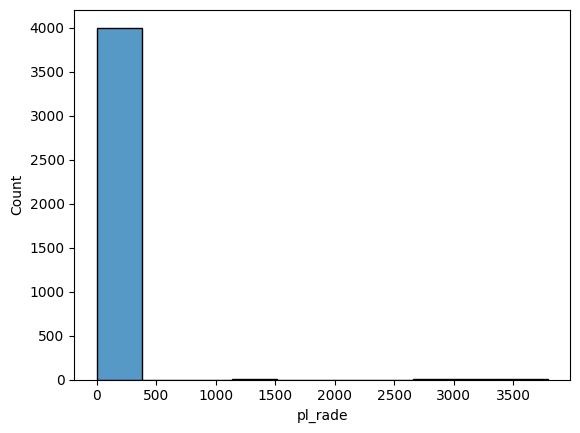

In [38]:
%matplotlib inline

sns.histplot(exopl_char['pl_rade'], bins = 10)

Finally some actual characteristics of planets

In [12]:
exoplanets['st_spectype'].value_counts()

G0 V              70
G5 V              59
G5                59
M0 V              57
K0 V              56
                  ..
B9 Vne             1
M3.3               1
M(3.5+/-0.5) V     1
K2 IV              1
K1 IIIb-IV         1
Name: st_spectype, Length: 228, dtype: int64

Interesting, the column that supposedly gives spectral type is sparse. Mostly empty values

<AxesSubplot: >

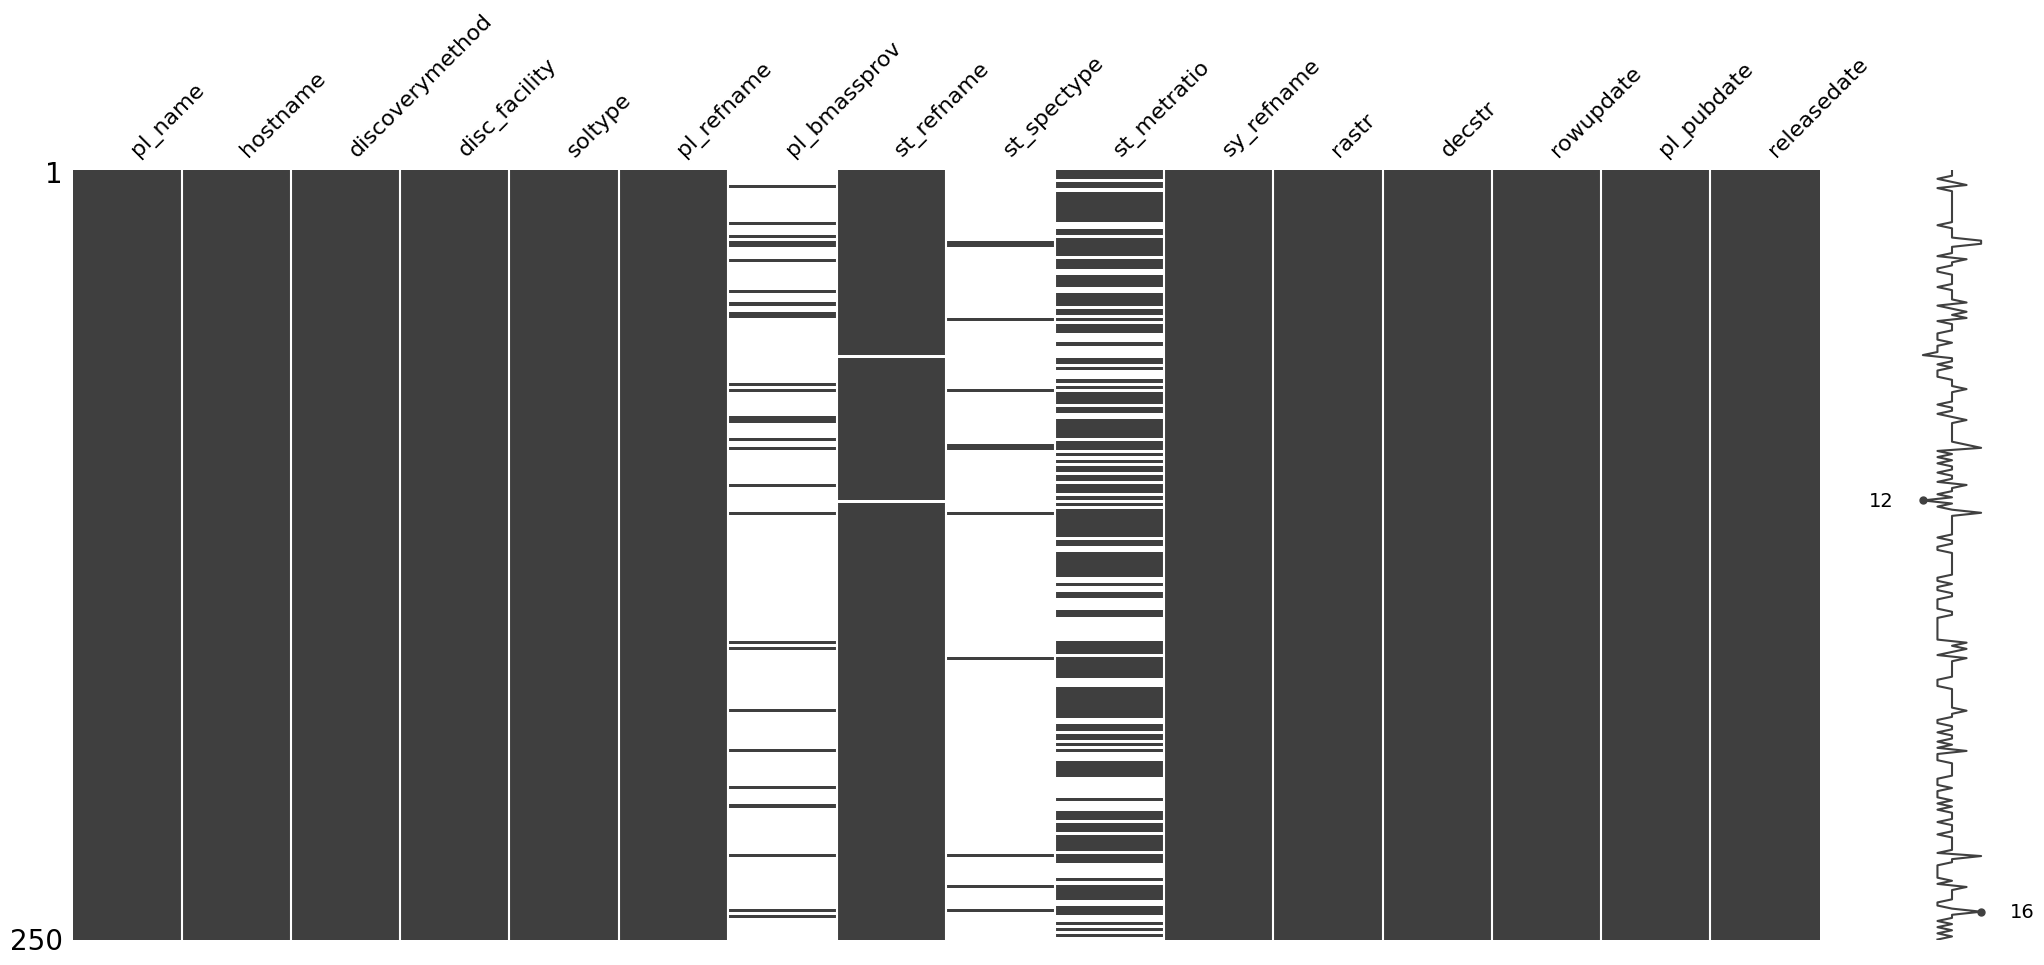

In [13]:
%matplotlib inline

msno.matrix(exo_cat.sample(250))